## DEMANDA

iremos trabalhar com previsões de vendas de uma loja.

Será necessário

- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

### Instalação das bibliotecas

In [37]:
# pipenv install pandas matplotlib seaborn numpy scikit-learn 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [39]:
%matplotlib inline

In [40]:
# Configurar locale para formatar valores em R$
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

## Carregar os dados

In [41]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [42]:
df_vendas = pd.DataFrame(dados_vendas)

In [43]:
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [44]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [45]:
# 3. Adicionar uma coluna para representar os meses numericamente
df_vendas['mes_numero'] = range(1, 13)

In [46]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         12 non-null     object
 1   vendas      12 non-null     int64 
 2   mes_numero  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


### EDA

In [47]:
# vericar as  Medidas estatísticas do DF
df_vendas.describe()

,vendas,mes_numero
count,12.000000,12.000000
mean,2716.666667,6.500000
std,410.838020,3.605551
min,2000.000000,1.000000
25%,2450.000000,3.750000
50%,2750.000000,6.500000
75%,3025.000000,9.250000
max,3300.000000,12.000000


<Axes: xlabel='vendas'>

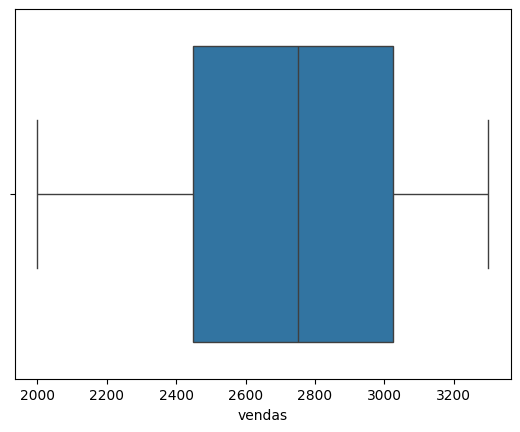

In [51]:
# Detectar outliers
sns.boxplot(data=df_vendas, x='vendas')

<Axes: xlabel='mes', ylabel='vendas'>

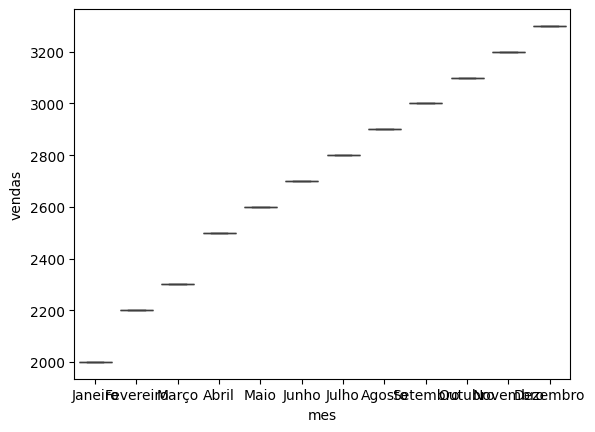

In [54]:

# Cruzamento de Variaveis Categoricas com nivel de Colesterol
sns.boxplot(data=df_vendas,x='mes', y='vendas')

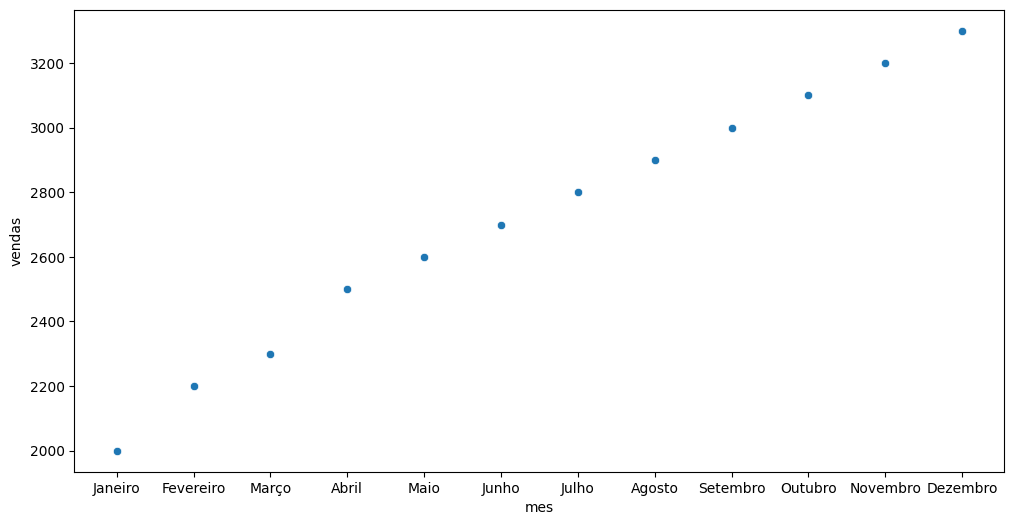

In [59]:
# Cruzamento de variaveis numéricas com o target 
# Ajustar o tamanho da figura
plt.figure(figsize=(12, 6))  # (largura, altura) em polegadas

# Plotar o gráfico
sns.scatterplot(data=df_vendas, x='mes', y='vendas')

# Mostrar o gráfico
plt.show()

### Treinamento do modelo

In [63]:
# Dividir os dados em conjuntos de treinamento e teste
X = df_vendas[['mes_numero']]
y = df_vendas['vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
#  Escolher e treinar um modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Fazer predições no conjunto de teste
y_pred = model.predict(X_test)

In [67]:
#Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)

In [68]:
#Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)

In [69]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5765.308510970324
R^2 Score: 0.9804933170681456


In [70]:
# Exibir os coeficientes do modelo
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

Intercepto: 2019.5530726256984
Coeficiente: [109.3575419]


In [72]:
# Prever as vendas para o mês de Dezembro (mes_numero = 12)
print(f"Previsão de vendas para Dezembro: {model.predict([[12]])[0]}")

Previsão de vendas para Dezembro: 3331.843575418994


/home/srmatheusmaciel/.local/share/virtualenvs/previsao_vendas-lO6cxizo/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


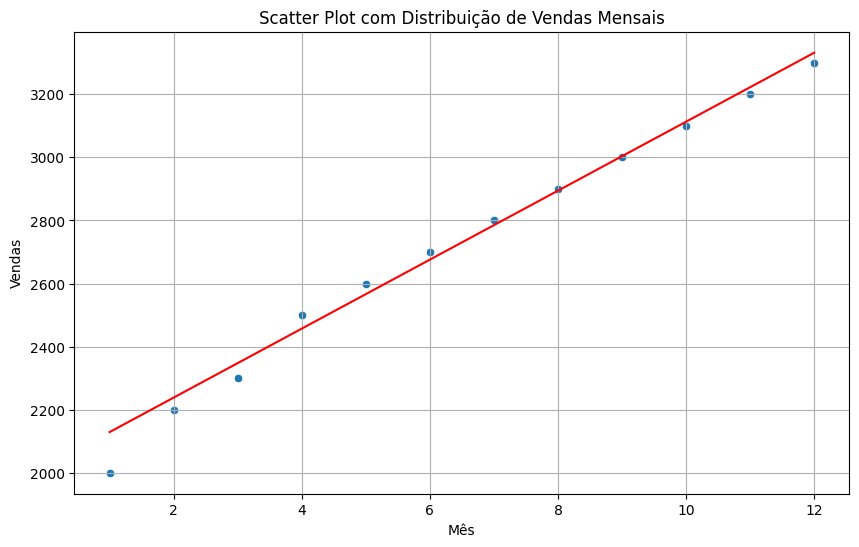

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_numero'], model.predict(df_vendas[['mes_numero']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()